1:Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

Step 1:Importing Libraries:

Import the necessary libraries TensorFlow, Keras, NumPy, and Matplotlib to get going.

In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


Step 2:Load the fMNIST Dataset.

The fMNIST dataset can be loaded using the fashion_mnist.load_data() function from Keras Datasets. The dataset will be automatically divided into training and testing sets by this function.

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Step 3. Examine the dataset:

Dimensions of Data:

To determine the size of the dataset, look at the dimensions of the loaded arrays.

In [5]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


The output will display the arrays' dimensions, including the number of samples, the size of the images, and label data for both the training and test sets.

2: Visualisation of Data Sample:

To gain a sense of the photos' appearances and the class labels to which they correspond, show a few samples from the dataset.

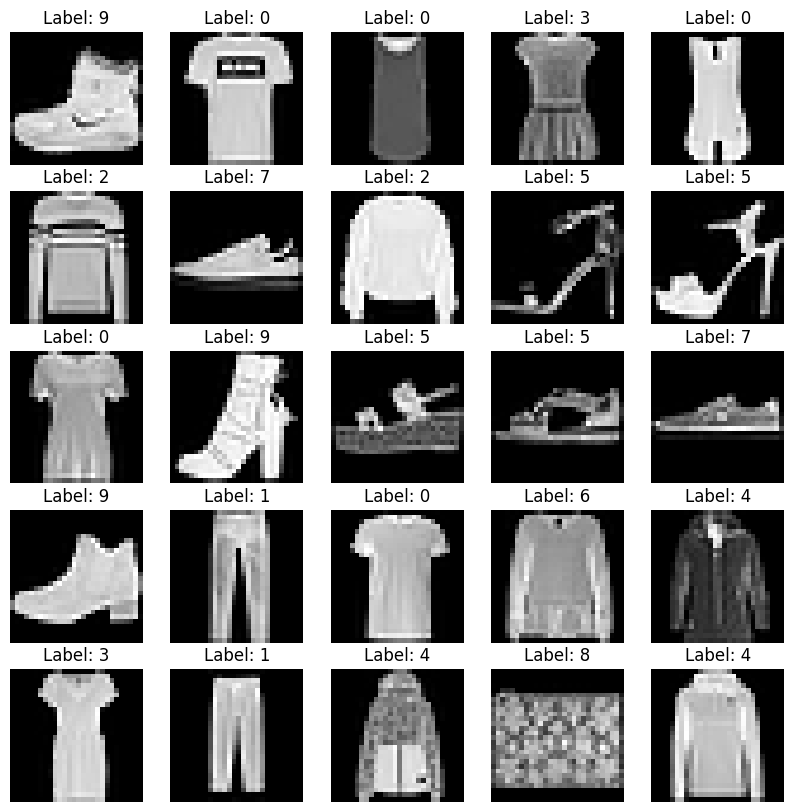

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

With the help of this code,we can see a sample of the fashion items in the dataset by seeing a 5x5 grid of photos and their related labels.

3:Class Representation:

To determine if there is a balanced representation of data across all classes, plot a histogram of the class distribution.

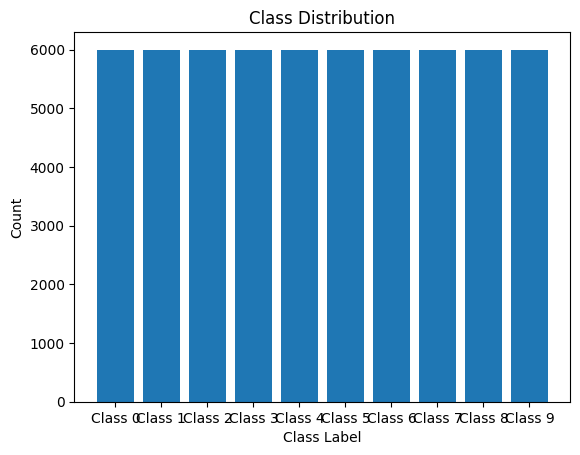

In [7]:
unique_classes, class_counts = np.unique(train_labels, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, [f"Class {c}" for c in unique_classes])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

The quantity of samples for each class is displayed in this histogram, allowing us to spot any class imbalances that can affect the training of your model.

2:Train a dense neural network using Keras (2 points)

Step 1: Import Libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

Step 2: Preprocess and Load the Data

In [19]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for dense neural networks
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

Step 3:Build the Dense Neural Network

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28*28,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

This illustration uses a straightforward dense neural network with two hidden layers that each employ the ReLU activation function. Ten units (one for each class) make up the output layer, which uses softmax activation for multiclass classification.

Step 4: Put the Model Together

In [21]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Step 5: Train the Model

In [22]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5176 - accuracy: 0.8178 - val_loss: 0.4012 - val_accuracy: 0.8557
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3812 - accuracy: 0.8606 - val_loss: 0.3638 - val_accuracy: 0.8722
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3410 - accuracy: 0.8736 - val_loss: 0.3473 - val_accuracy: 0.8708
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3190 - accuracy: 0.8815 - val_loss: 0.3376 - val_accuracy: 0.8779
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2958 - accuracy: 0.8909 - val_loss: 0.3657 - val_accuracy: 0.8676
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.8957 - val_loss: 0.3288 - val_accuracy: 0.8812
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2702 - accuracy: 0.8977 - val_loss: 0.3251 - val_accuracy:

Using a batch size of 32, we train the model in this example for 10 epochs, and 20% of the training data is used as validation data to check the model's performance as it trains.

Then assess the model's performance on the test set after training it to determine how effectively it generalises to new data.

3:Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

Step 1: Evaluate accuracy

Using the evaluate approach, we may assess the model's accuracy on the test set after training. A measurement of the model's performance on unobserved data will be provided via the accuracy metric.

In [24]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8730
Test Accuracy: 0.8730000257492065


Step 2:Confusion Matrix 

A confusion matrix, which displays the amount of true positives, true negatives, false positives, and false negatives for each class, can be made to further examine the performance of the model. This matrix gives us insight into the classes that are frequently misclassified as well as potential trends or problems.

313/313 [==============================] - 0s 1ms/step


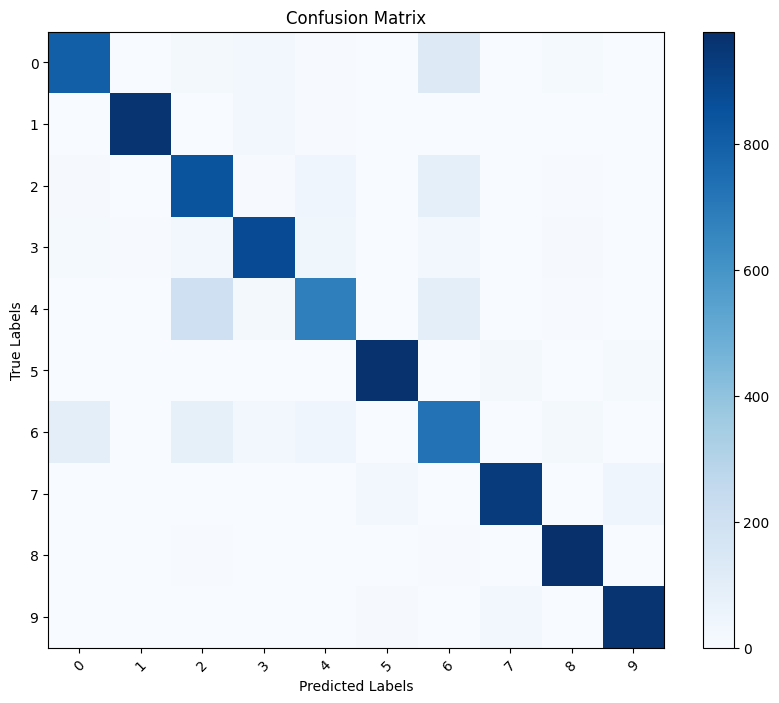

In [28]:
from sklearn.metrics import confusion_matrix

# Get model predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10), rotation=45)
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Step 3: Research Wrong Classification

By contrasting the actual and predicted labels for misclassified photos, we may visually analyse individual instances of wrong categorization.

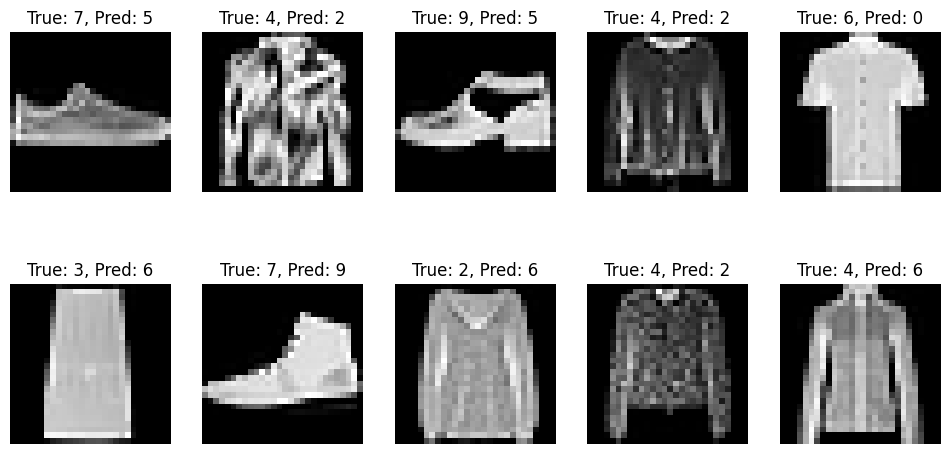

In [29]:
# Find misclassified indices
misclassified_indices = np.where(test_labels != predicted_labels)[0]

# Display some misclassified images
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[index]}, Pred: {predicted_labels[index]}")
    plt.axis('off')
plt.show()

Step 4: Reach a decision

We may make some judgements about the model's performance by looking at the confusion matrix, accuracy, and misclassified examples:

Accuracy: The accuracy determined in Step 1 gives a general indication of how well the model performed on the test set. A high accuracy means that, on average, the model is doing well.

Confusion Matrix: We can assess the model's ability to discriminate between several classes using the confusion matrix from Step 2. It identifies which classes are frequently misclassified and offers information on possible directions for development.

improper Classification: In Step 3, we looked at specific instances of improper classification to find patterns or issues with the model's predictions. For instance, due to visual similarity, several classes may be mistaken for one another.

Based on these findings, we can decide what additional model enhancements to make, such as tweaking hyperparameters, changing the model's architecture, or taking into account methods like data augmentation or transfer learning to boost performance in difficult scenarios. Insights from the confusion matrix and incorrectly categorised samples can also direct our attention to the areas where the model requires further training data or specialised management.